First we import the mnist_reader from the utils folder

In [1]:
from utils import mnist_reader 

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


Now we need to load the dataset 

In [3]:
data_folder = "./data"
training_img, training_lbl = mnist_reader.load_mnist(data_folder, "train")
testing_img, testing_lbl = mnist_reader.load_mnist(data_folder, "t10k")

training_img = training_img.reshape(-1, 28, 28)
testing_img = testing_img.reshape(-1,28,28)



In [4]:
import numpy as np

import seaborn as sns
import keras
import tensorflow as tf 

Now we will look at what type of array the training images and training labels 

In [5]:
training_img.shape, training_lbl.shape

((60000, 28, 28), (60000,))

In [6]:
testing_img.shape, testing_lbl.shape

((10000, 28, 28), (10000,))

now we will look at the first label in training labels set and also the first image in the test image set

In [7]:
training_lbl[0]

9

In [8]:
testing_img[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Now we will create a list with all the labels used in Fashion MNIST Dataset

In [9]:
fashion_product_labels = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
fashion_product_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Next we will look at how the dataset is with the appropriate class labels 

Train: images=(60000, 28, 28), labels=(60000,)
Test: images=(10000, 28, 28), labels=(10000,)


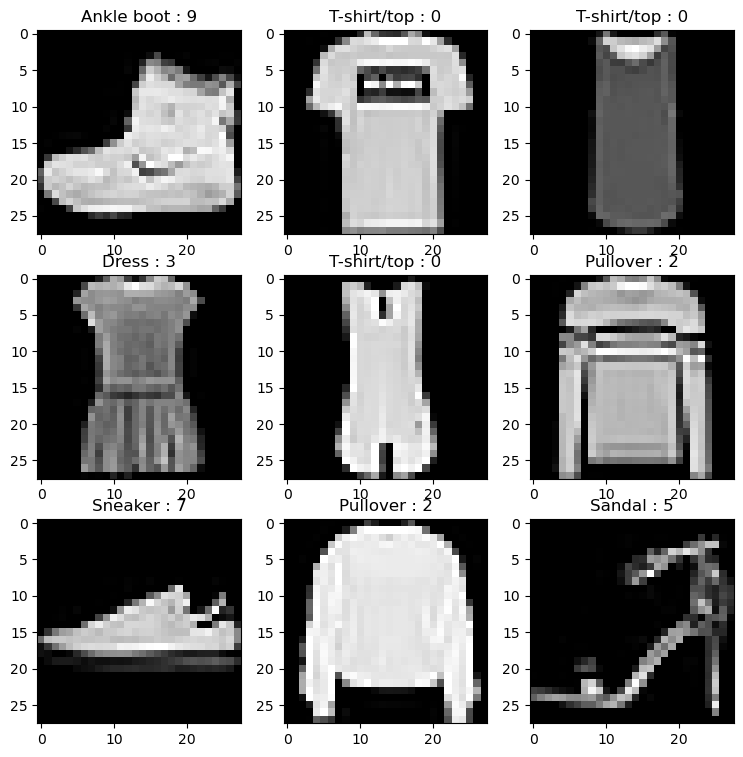

In [10]:
# show how dataset looks like
from matplotlib import pyplot
print('Train: images=%s, labels=%s' % (training_img.shape, training_lbl.shape))
print('Test: images=%s, labels=%s' % (testing_img.shape, testing_lbl.shape))
# plot first few 9 images 
pyplot.figure(figsize=(9,9))
for i in range(9):
    
 pyplot.subplot(330 + 1 + i)
 pyplot.imshow(training_img[i], cmap=pyplot.get_cmap('gray'))
 pyplot.title('{} : {}'.format(fashion_product_labels[training_lbl[i]], training_lbl[i]))
 

pyplot.show()

In [11]:
training_img.shape

(60000, 28, 28)

In [12]:
training_img.ndim

3

In [13]:
training_img = np.expand_dims(training_img , -1)
testing_img = np.expand_dims(testing_img, -1)

In [14]:
training_img.ndim

4

In [15]:
training_img.shape


(60000, 28, 28, 1)

In [16]:
testing_img.shape

(10000, 28, 28, 1)

In [17]:
training_img.ndim

4

In [18]:
testing_img.ndim

4

In [19]:
training_img = training_img/255
testing_img = testing_img/255

In [20]:
from sklearn.model_selection import train_test_split
training_img,testing_img,training_lbl,testing_lbl = train_test_split(training_img,training_lbl,test_size=0.2,random_state=2020)

In [21]:
training_img.shape,testing_img.shape,training_lbl.shape,testing_lbl.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [22]:
import keras


In [23]:
model2= keras.models.Sequential([
    
       tf.keras.layers.Conv2D(filters=52,kernel_size=2,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
       tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
       tf.keras.layers.Conv2D(filters=104, kernel_size=2,strides=(2,2),padding='same',activation='relu'),
       tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(units=208,activation='relu'),
       tf.keras.layers.Dropout(0.25),
       tf.keras.layers.Dense(units=416,activation='relu'),
       tf.keras.layers.Dropout(0.25),
       tf.keras.layers.Dense(units=208,activation='relu'),
       tf.keras.layers.Dense(units=10,activation='softmax')
        ])

In [24]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
model2.fit(training_img,training_lbl,epochs=20,batch_size=16,verbose=1,validation_data=(testing_img,testing_lbl))

Epoch 1/20
3000/3000 [==============================] - 36s 12ms/step - loss: 0.5479 - accuracy: 0.7948 - val_loss: 0.4077 - val_accuracy: 0.8482
Epoch 2/20
3000/3000 [==============================] - 42s 14ms/step - loss: 0.3743 - accuracy: 0.8629 - val_loss: 0.3563 - val_accuracy: 0.8662
Epoch 3/20
3000/3000 [==============================] - 44s 15ms/step - loss: 0.3294 - accuracy: 0.8781 - val_loss: 0.3020 - val_accuracy: 0.8860
Epoch 4/20
3000/3000 [==============================] - 35s 12ms/step - loss: 0.2985 - accuracy: 0.8892 - val_loss: 0.3114 - val_accuracy: 0.8846
Epoch 5/20
3000/3000 [==============================] - 38s 13ms/step - loss: 0.2807 - accuracy: 0.8972 - val_loss: 0.2922 - val_accuracy: 0.8958
Epoch 6/20
3000/3000 [==============================] - 42s 14ms/step - loss: 0.2642 - accuracy: 0.9007 - val_loss: 0.2835 - val_accuracy: 0.8977
Epoch 7/20
3000/3000 [==============================] - 43s 14ms/step - loss: 0.2470 - accuracy: 0.9080 - val_loss: 0.2851 -

In [26]:
y_pred = model2.predict(testing_img)

375/375 [==============================] - 3s 6ms/step


In [27]:
model2.evaluate(testing_img,testing_lbl)

375/375 [==============================] - 2s 5ms/step - loss: 0.3831 - accuracy: 0.8865


[0.3831038475036621, 0.8865000009536743]

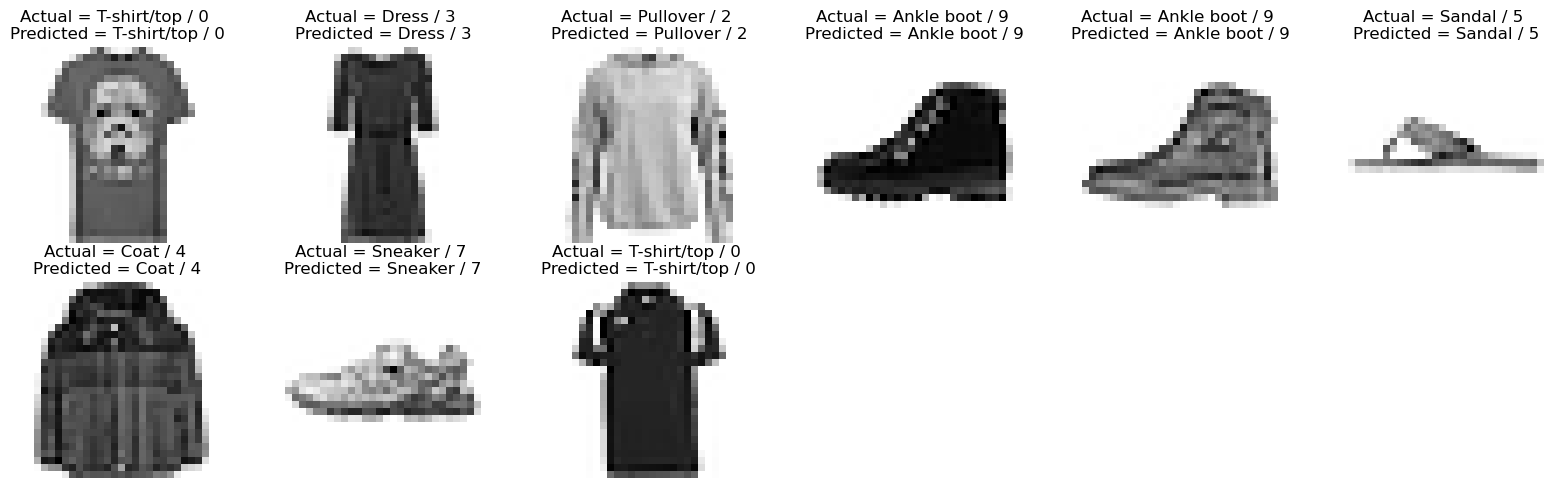

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))

j=1
for i in range(9):
  plt.subplot(10,6, j)
  j+=1
  plt.imshow(testing_img[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(fashion_product_labels[testing_lbl[i]], testing_lbl[i],fashion_product_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

<AxesSubplot:>

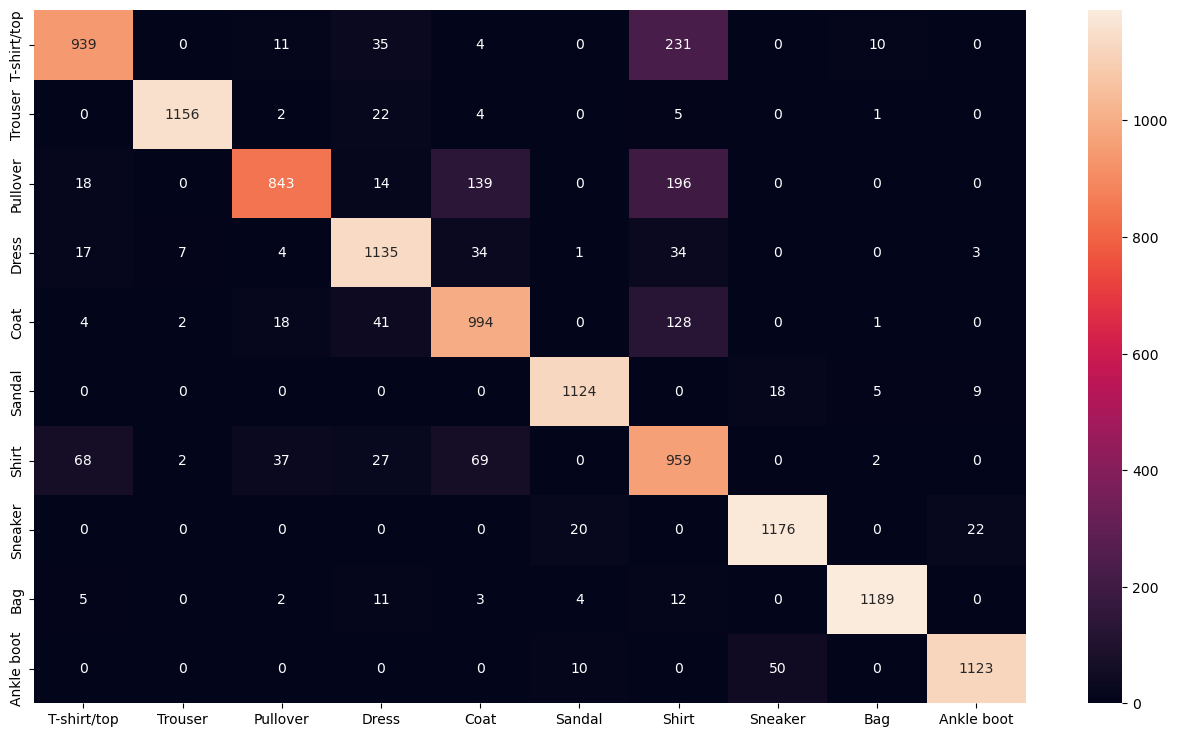

In [29]:
from sklearn.metrics import confusion_matrix

pyplot.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred]
confmx=confusion_matrix(testing_lbl,y_pred_labels)

sns.heatmap(confmx, annot=True, fmt='d', xticklabels=fashion_product_labels, yticklabels=fashion_product_labels)

In [30]:
from sklearn.metrics import classification_report
cr= classification_report(testing_lbl,y_pred_labels,target_names=fashion_product_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.76      0.82      1230
     Trouser       0.99      0.97      0.98      1190
    Pullover       0.92      0.70      0.79      1210
       Dress       0.88      0.92      0.90      1235
        Coat       0.80      0.84      0.82      1188
      Sandal       0.97      0.97      0.97      1156
       Shirt       0.61      0.82      0.70      1164
     Sneaker       0.95      0.97      0.96      1218
         Bag       0.98      0.97      0.98      1226
  Ankle boot       0.97      0.95      0.96      1183

    accuracy                           0.89     12000
   macro avg       0.90      0.89      0.89     12000
weighted avg       0.90      0.89      0.89     12000



In [31]:
model2.save('cnn_model_deep_learning_cw2.h5')

In [32]:
cnn_model_deep_learning_cw2 = tf.keras.models.load_model('cnn_model_deep_learning_cw2.h5')

In [33]:
new_y_pred_sample2 = cnn_model_deep_learning_cw2.predict(np.expand_dims(testing_img[0], axis=0)).round(2)
np.argmax(new_y_pred_sample2[0])

1/1 [==============================] - 0s 91ms/step


0

In [34]:
testing_lbl[0]

0